# Importing Libraries

In [5]:
import matplotlib.colors as colors
from infomap import Infomap
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import random
from operator import itemgetter
import matplotlib.pyplot as plt
import community
from heapq import nlargest, nsmallest

## Creating a directed graph

In [6]:
edges = pd.read_csv('connections.txt', delimiter=' ', names=['from', 'to'])
G = nx.DiGraph()
G.add_edges_from(np.array(edges))

In [7]:
# nx.draw_networkx(G)

## The bridges of the graph

In [8]:
# let's understand the top 20 bridges, using the betweennesses centrality
betweenness = nx.betweenness_centrality(G)
bridges = nlargest(20, betweenness, key=betweenness.get)
for i in bridges:
    print(f'Node {i}: Betweenness {betweenness[i]}')

Node 1684: Betweenness 0.03299985344063623
Node 1912: Betweenness 0.027145672353148857
Node 1718: Betweenness 0.026577614223444346
Node 563: Betweenness 0.01300961569074186
Node 1405: Betweenness 0.010123670299605515
Node 1656: Betweenness 0.009425937129610911
Node 1086: Betweenness 0.008553563518788857
Node 567: Betweenness 0.008300375906658487
Node 3437: Betweenness 0.008194350620311139
Node 119: Betweenness 0.006358997369476009
Node 1435: Betweenness 0.005411020189789544
Node 526: Betweenness 0.005301465796260494
Node 1621: Betweenness 0.0048429568781480315
Node 173: Betweenness 0.0048358807566961605
Node 1561: Betweenness 0.004750572119721505
Node 1376: Betweenness 0.004516894103812997
Node 1666: Betweenness 0.004499661887491212
Node 1334: Betweenness 0.00441478425428826
Node 1559: Betweenness 0.00410018375278715
Node 1663: Betweenness 0.003944074440322393


Nodes with higher betweenness centrality values play a more crucial role in connecting different parts of the graph.
Nodes with lower betweenness centrality values are less likely to be on the shortest paths between other nodes.
For the specific nodes mentioned above highest betweenness cetrality resembles the bridges of the graph.

## The density of the graph

In [9]:
nx.density(G)

0.0054099817517196435

A density of 0.0054099817517196435 suggests a sparse graph where only a small fraction of possible edges are present. This is a common scenario in real-world networks, as many networks exhibit a sparse connectivity pattern. This comes from the fact of having not many connected edges. 

## Nodes with the highest and lowest number of connections

In [10]:
# Top 10 nodes with the highest degree
top_10_nodes = nlargest(10, G.nodes, key=G.degree)
top_10_degrees = [(node, G.degree(node)) for node in top_10_nodes]
print("Top 10 nodes with the highest degree:")
for node, degree in top_10_degrees:
    print(f"Node {node}: Degree {degree}")

# Bottom 10 nodes with the lowest degree
bottom_10_nodes = nsmallest(10, G.nodes, key=G.degree)
bottom_10_degrees = [(node, G.degree(node)) for node in bottom_10_nodes]
print("\nBottom 10 nodes with the lowest degree:")
for node, degree in bottom_10_degrees:
    print(f"Node {node}: Degree {degree}")


Top 10 nodes with the highest degree:
Node 107: Degree 1045
Node 1684: Degree 792
Node 1912: Degree 755
Node 3437: Degree 547
Node 0: Degree 347
Node 2543: Degree 294
Node 2347: Degree 291
Node 1888: Degree 254
Node 1800: Degree 245
Node 1663: Degree 235

Bottom 10 nodes with the lowest degree:
Node 11: Degree 1
Node 12: Degree 1
Node 15: Degree 1
Node 18: Degree 1
Node 37: Degree 1
Node 43: Degree 1
Node 74: Degree 1
Node 114: Degree 1
Node 209: Degree 1
Node 210: Degree 1


The nodes with the highest number of connections in the network indicate them being central to the overall connectivity. In a social network context, these nodes might represent individuals who are highly connected or influetial.


The nodes with lowest number of connections in the network indicate that they are relatively less connected. In a social network, these nodes might represent individuals with fewer connections or less influence in the overall network structure.


## The nodes having the highest incoming and outgoing connections

In [11]:
# Top 10 nodes with the highest incoming connections
top_10_in_nodes = nlargest(10, G.nodes, key=G.in_degree)
top_10_in_degrees = [(node, G.in_degree(node)) for node in top_10_in_nodes]
print("Top 10 nodes with the highest incoming connections:")
for node, in_degree in top_10_in_degrees:
    print(f"Node {node}: In-Degree {in_degree}")

# Top 10 nodes with the highest outgoing connections
top_10_out_nodes = nlargest(10, G.nodes, key=G.out_degree)
top_10_out_degrees = [(node, G.out_degree(node)) for node in top_10_out_nodes]
print("\nTop 10 nodes with the highest outgoing connections:")
for node, out_degree in top_10_out_degrees:
    print(f"Node {node}: Out-Degree {out_degree}")


Top 10 nodes with the highest incoming connections:
Node 1888: In-Degree 251
Node 2543: In-Degree 246
Node 1800: In-Degree 216
Node 2611: In-Degree 197
Node 1827: In-Degree 186
Node 1730: In-Degree 183
Node 2607: In-Degree 183
Node 1833: In-Degree 182
Node 2602: In-Degree 182
Node 2604: In-Degree 182

Top 10 nodes with the highest outgoing connections:
Node 107: Out-Degree 1043
Node 1684: Out-Degree 778
Node 1912: Out-Degree 748
Node 3437: Out-Degree 542
Node 0: Out-Degree 347
Node 348: Out-Degree 225
Node 1941: Out-Degree 215
Node 1985: Out-Degree 207
Node 483: Out-Degree 191
Node 1917: Out-Degree 189


The nodes with the highest number of incoming connections are frequenctly targeted by other nodes in the network. Such nodes are 1888, 2543,1800 , and more. 

The nodes that have the highest number of outgoing connections show that they initiate connections with other nodes in the network more frequently. These are 107, 1684, 1912 and more.

## Nodes having the highest closeness, betweenness, and eigenvector 

In [12]:
# Closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Top 3 nodes with the highest closeness centrality
top_3_closeness_nodes = nlargest(3, G.nodes, key=closeness_centrality.get)
top_3_closeness_values = [(node, closeness_centrality[node]) for node in top_3_closeness_nodes]
print("Top 3 nodes with the highest closeness centrality:")
for node, closeness_value in top_3_closeness_values:
    print(f"Node {node}: Closeness Centrality {closeness_value}")

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Top 3 nodes with the highest betweenness centrality
top_3_betweenness_nodes = nlargest(3, G.nodes, key=betweenness_centrality.get)
top_3_betweenness_values = [(node, betweenness_centrality[node]) for node in top_3_betweenness_nodes]
print("\nTop 3 nodes with the highest betweenness centrality:")
for node, betweenness_value in top_3_betweenness_values:
    print(f"Node {node}: Betweenness Centrality {betweenness_value}")

# Approximate eigenvector centrality
approx_eigenvector_centrality = nx.eigenvector_centrality_numpy(G, max_iter=500)

# Top 3 nodes with the highest approximate eigenvector centrality
top_3_approx_eigenvector_nodes = nlargest(3, G.nodes, key=approx_eigenvector_centrality.get)
top_3_approx_eigenvector_values = [(node, approx_eigenvector_centrality[node]) for node in top_3_approx_eigenvector_nodes]
print("\nTop 3 nodes with the highest approximate eigenvector centrality:")
for node, approx_eigenvector_value in top_3_approx_eigenvector_values:
    print(f"Node {node}: Approx. Eigenvector Centrality {approx_eigenvector_value}")


Top 3 nodes with the highest closeness centrality:
Node 2642: Closeness Centrality 0.11797503012816456
Node 2649: Closeness Centrality 0.11793232689533308
Node 2629: Closeness Centrality 0.11629338421878259

Top 3 nodes with the highest betweenness centrality:
Node 1684: Betweenness Centrality 0.03299985344063623
Node 1912: Betweenness Centrality 0.027145672353148857
Node 1718: Betweenness Centrality 0.026577614223444346

Top 3 nodes with the highest approximate eigenvector centrality:
Node 2655: Approx. Eigenvector Centrality 0.5112518698112615
Node 2654: Approx. Eigenvector Centrality 0.4117830633067103
Node 2638: Approx. Eigenvector Centrality 0.3440861682709844


The nodes having the highest closeness centrality are, on average, closest to all other nodes in the network. In practical terms, they may represent nodes that can efficiently reach other nodes in the network. Top 3 of them are 2642, 2649 and 2629. 

The highest betweenness centrality means playing a critical role in facilitating communication between different parts of the network. Removing these nodes might disrupt the flow of information in the network. Top of these nodes are 1684, 1912, 1718.

Nodes with high eigenvector centrality are well-connected to other well-connected nodes. In the context of network, these nodes are influential, and their connections have a considerable impact on their own importance.

## Community detection algorithm 

In [13]:
from infomap import Infomap
def find_communities_infomap(G):
    # Infomap instance
    im = Infomap("--two-level --directed")

    # Adding links to Infomap
    for edge in G.edges():
        im.addLink(*edge)

    # Running Infomap
    print("Find communities with Infomap")
    im.run()
    print(f"Found {im.num_top_modules} communities with codelength: {im.codelength}")

    # Mapping nodes to community IDs
    communities = {}
    for node in im.tree:
        communities[node.node_id] = node.module_id

    # Setting node attributes in the original graph
    nx.set_node_attributes(G, communities, 'community')

    return im.num_top_modules


In [15]:
print(find_communities_infomap(G))

Find communities with Infomap
Found 98 communities with codelength: 6.587416522147202
98



The algorithm has successfully identified and partitioned the graph into a total of 98 distinct communities. The term "codelength" serves as a quantitative metric that gauges the effectiveness of these communities in elucidating the underlying structure of the graph. A lower codelength value is indicative of a more optimal and cohesive community structure.

In this specific analysis, the computed codelength stands at 6.587416522147202. This value provides a measure of how well the identified communities capture and represent the inherent patterns and connections within the graph. The lower the codelength, the more efficiently the communities explain the overall structure of the graph, suggesting a higher quality of community detection. Therefore, the obtained codelength of 6.587416522147202 suggests a reasonably effective delineation of communities within the graph.

## The largest and the smallest community

In [16]:
# Community attributes from the graph
communities = nx.get_node_attributes(G, 'community')

# Size of each community
community_sizes = {community_id: sum(1 for node, comm_id in communities.items() if comm_id == community_id) 
                   for community_id in set(communities.values())}

# Largest and smallest communities
largest_community_id = max(community_sizes, key=community_sizes.get)
smallest_community_id = min(community_sizes, key=community_sizes.get)

# Nodes in the largest and smallest communities
largest_community_nodes = [node for node, comm_id in communities.items() if comm_id == largest_community_id]
smallest_community_nodes = [node for node, comm_id in communities.items() if comm_id == smallest_community_id]

# Results
print(f"Largest Community ({largest_community_id}): {len(largest_community_nodes)} nodes - {largest_community_nodes[:5]} and more.")
print(f"Smallest Community ({smallest_community_id}): {len(smallest_community_nodes)} nodes - {smallest_community_nodes}")


Largest Community (5): 432 nodes - [1684, 3173, 860, 2883, 2968] and more.
Smallest Community (38): 2 nodes - [669, 671]



- The term "largest community" refers to the grouping of nodes within a network that forms the most extensive and interconnected set. In this specific context.
- Conversely, the term "smallest community" refers to the grouping of nodes that constitutes the most limited and potentially isolated set within the network.

Largest Community (5):

Number of Nodes: The largest community, labeled as community 5, consists of 432 nodes. This indicates that there is a relatively large and interconnected group of nodes within the network that share common characteristics or connections.
Node IDs: The node IDs belonging to the largest community are provided as [1684, 3173, 860, 2883, 2968..., and more] These node IDs represent a subset of the nodes within the community. The "and more" indicates that there are additional nodes in the community beyond the ones explicitly listed.

Smallest Community (38):

Number of Nodes: The smallest community, labeled as community 38, comprises only 2 nodes. This suggests a smaller, potentially more isolated or specialized group of nodes within the network.
Node IDs: The node IDs belonging to the smallest community are [669, 671]. These node IDs represent the entirety of the nodes in the smallest community.

**Select the largest three communities and draw them. After doing so, remove the top 3
nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality,
and Eigenvector. Each should be in a separate plot/draw.**

In [17]:
communities = nx.get_node_attributes(G, 'community')
community_sizes = {community_id: sum(1 for node, comm_id in communities.items() if comm_id == community_id) 
                   for community_id in set(communities.values())}
largest_communities = nlargest(3, community_sizes, key=community_sizes.get)

# Largest three communities and their sizes
for community_id in largest_communities:
    print(f'Community {community_id} with {community_sizes[community_id]} nodes')


Community 5 with 432 nodes
Community 3 with 333 nodes
Community 2 with 271 nodes


In [18]:
def draw_community(graph, nodes, title):
    subgraph = graph.subgraph(nodes)
    plt.figure(figsize=(10, 8))
    nx.draw(subgraph, with_labels=True, font_size=8, font_color='white', node_size=50, font_weight='bold')
    plt.title(title)
    plt.show()


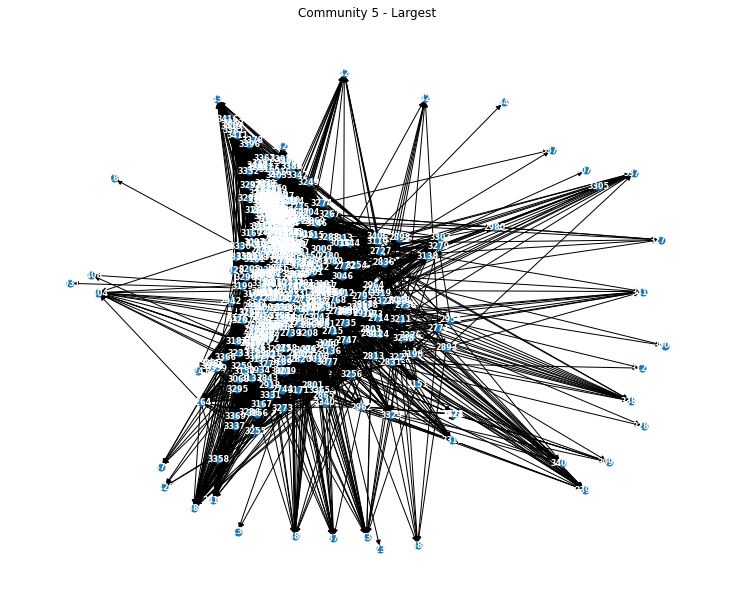

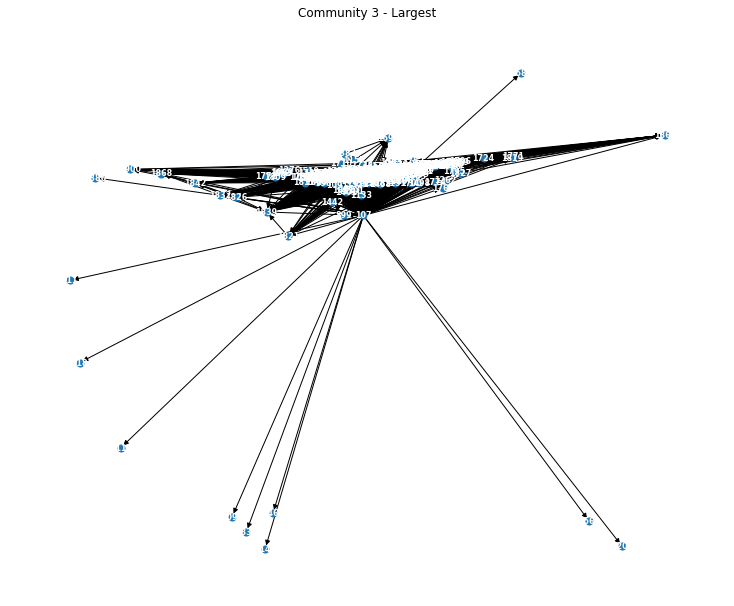

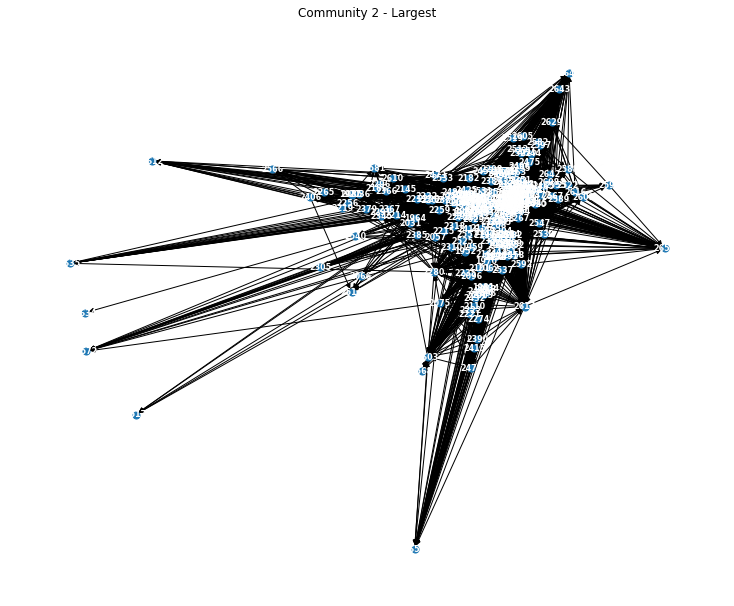

In [19]:
# Plotting the largest 3 communities
for community_id in largest_communities:
    community_nodes = [node for node, comm_id in communities.items() if comm_id == community_id]
    draw_community(G, community_nodes, f'Community {community_id} - Largest')


In [20]:
def remove_top_nodes(graph, centrality_measure):
    centrality_values = centrality_measure(graph)
    top_nodes = sorted(centrality_values, key=centrality_values.get, reverse=True)[:3]
    graph_copy = graph.copy()
    graph_copy.remove_nodes_from(top_nodes)
    return graph_copy


In [21]:
largest_community_subgraphs = []

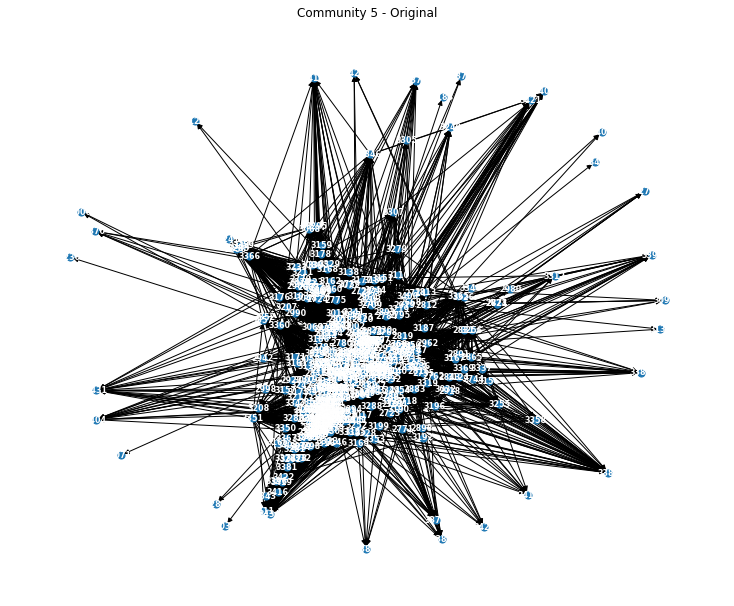

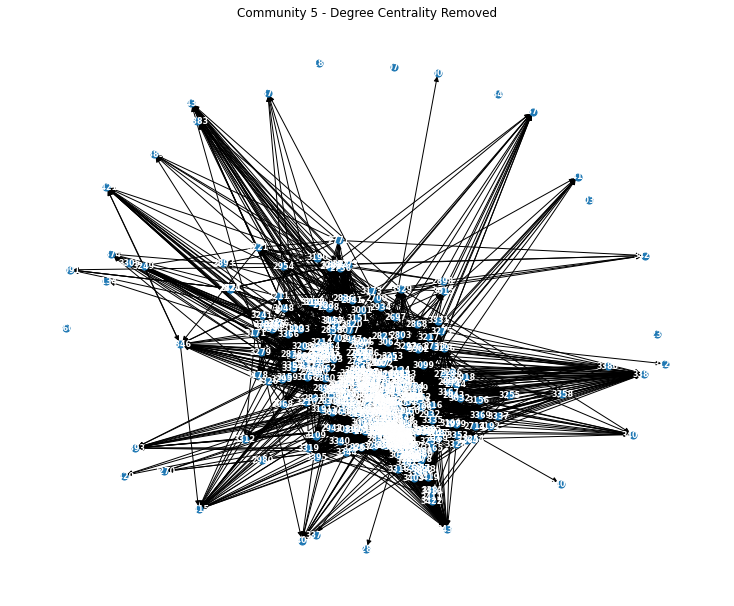

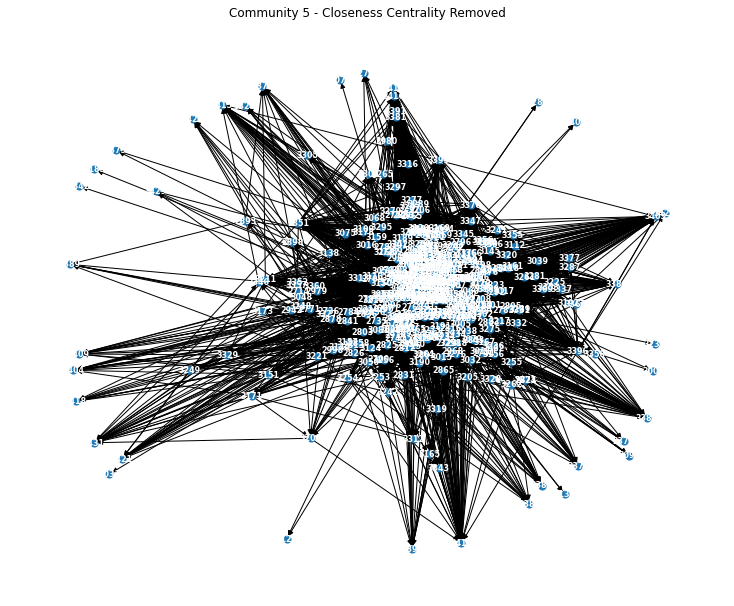

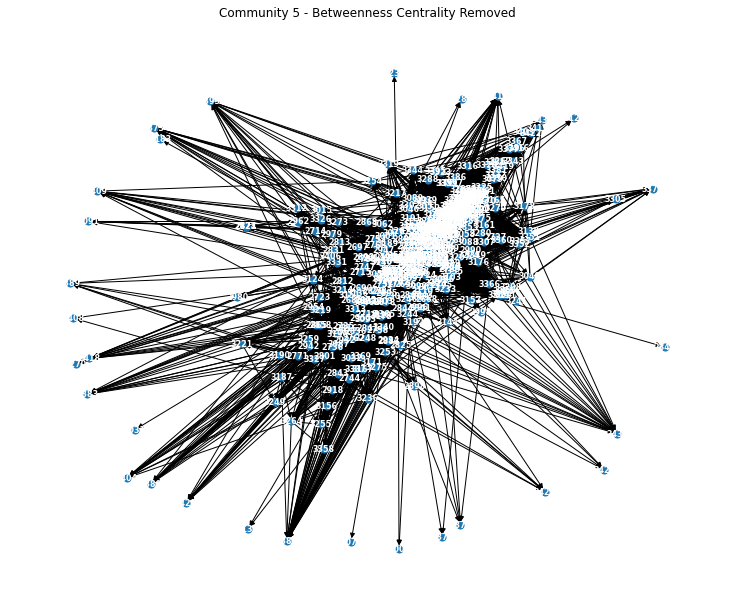

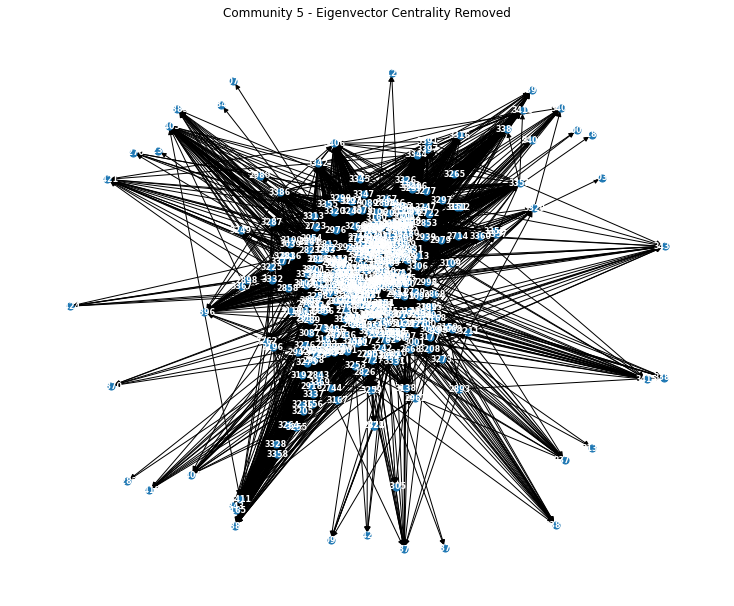

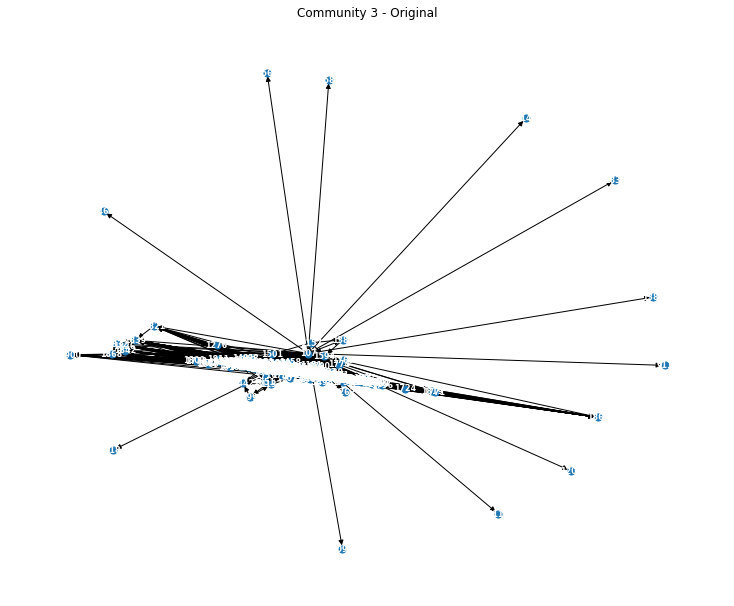

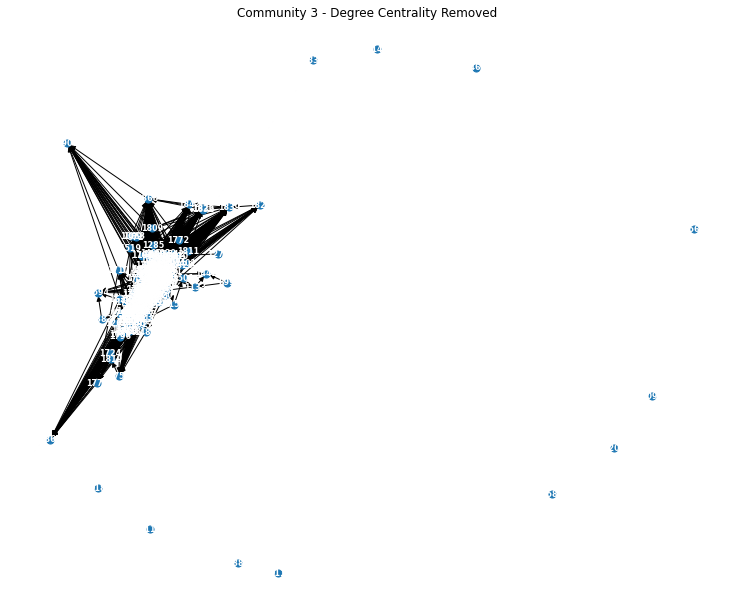

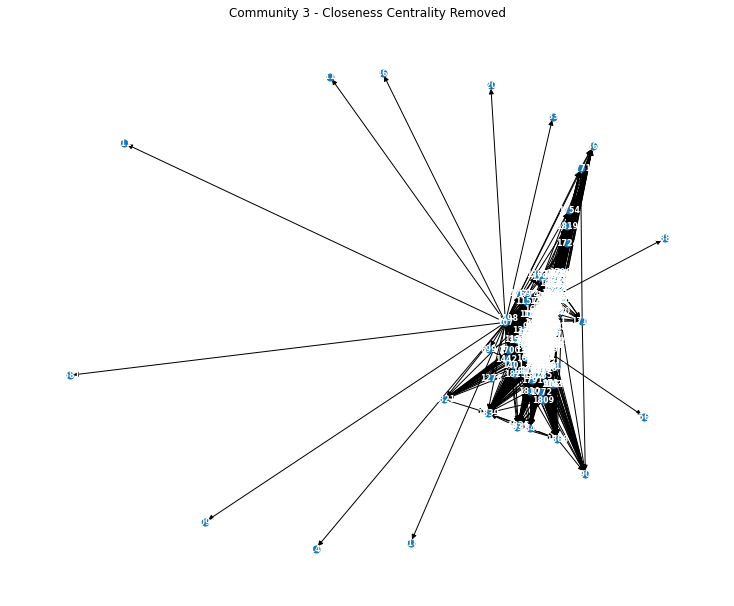

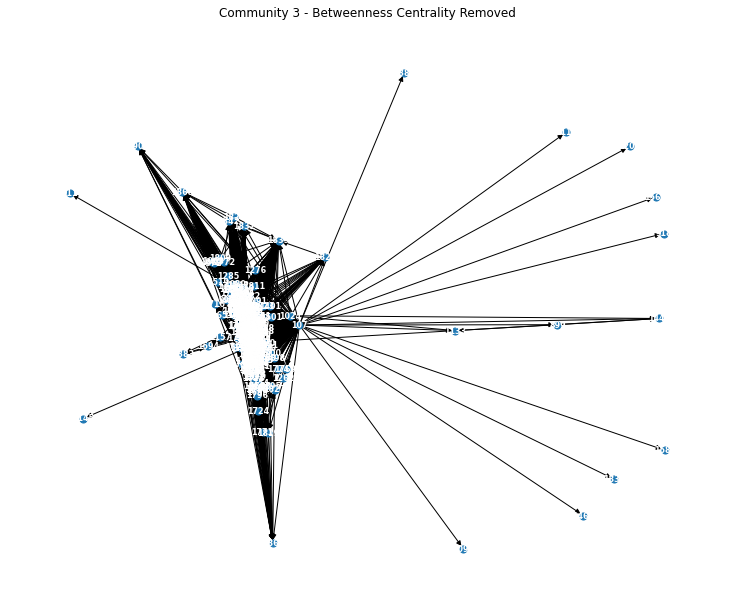

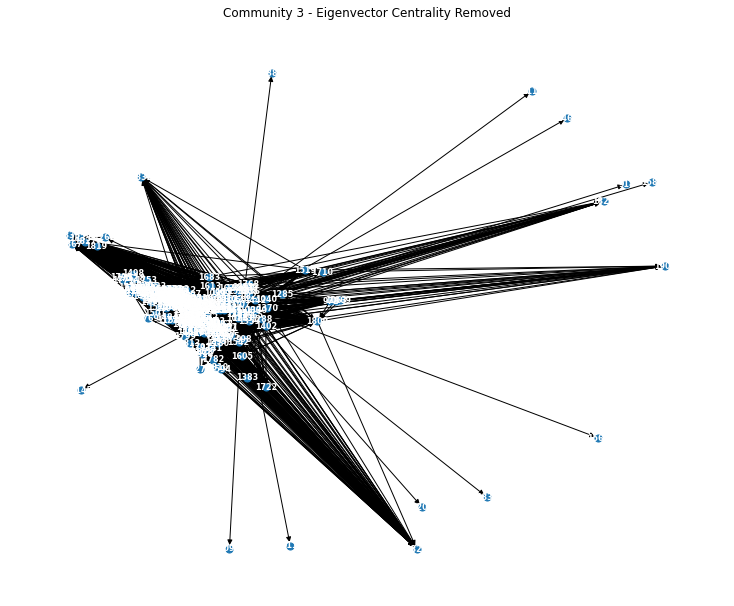

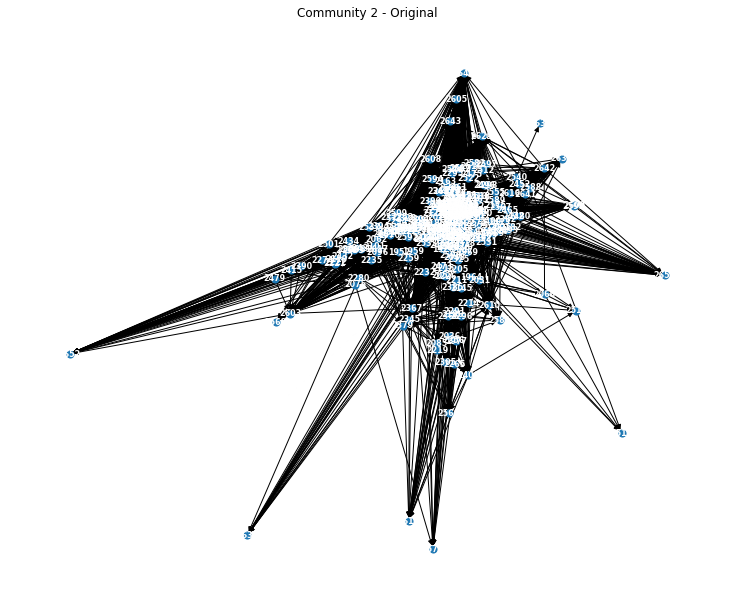

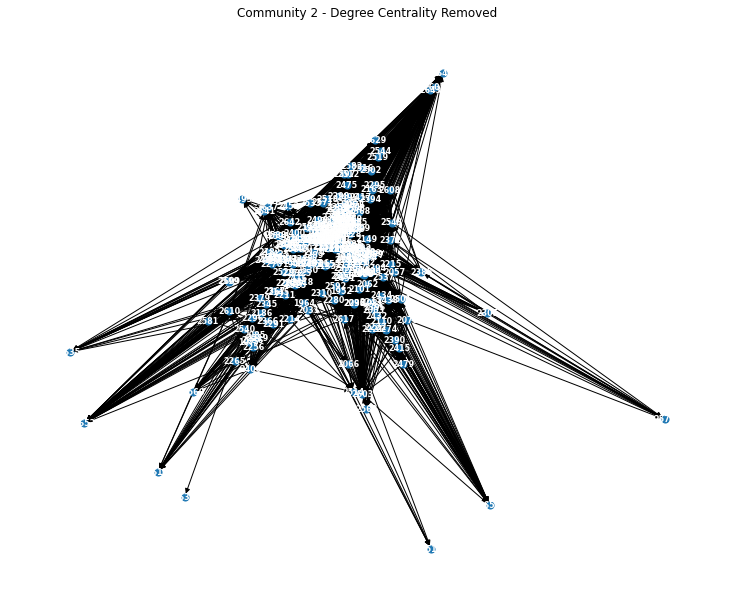

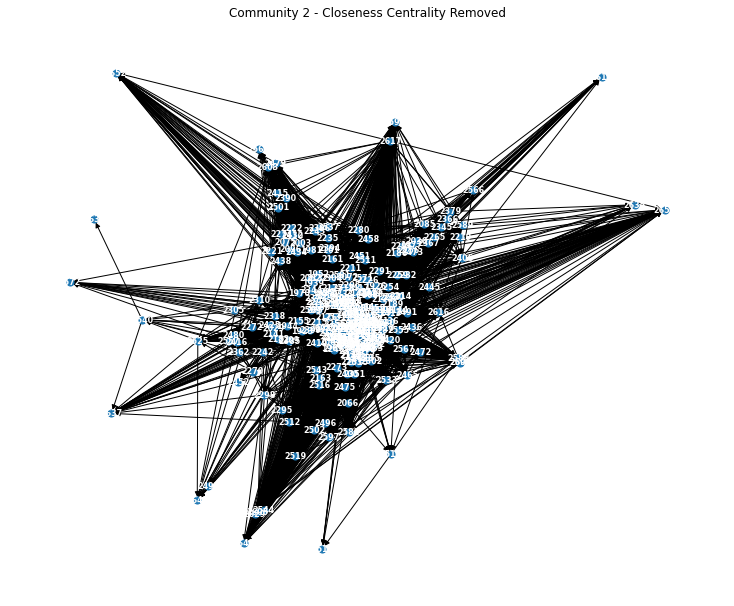

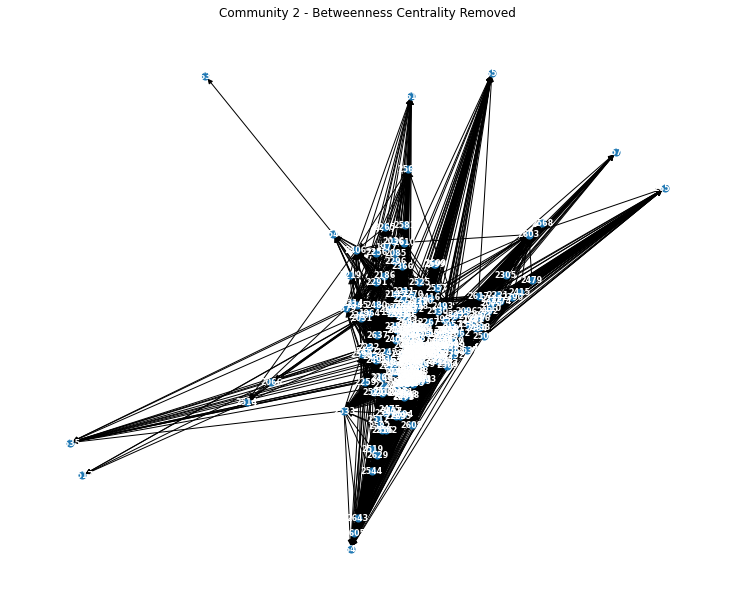

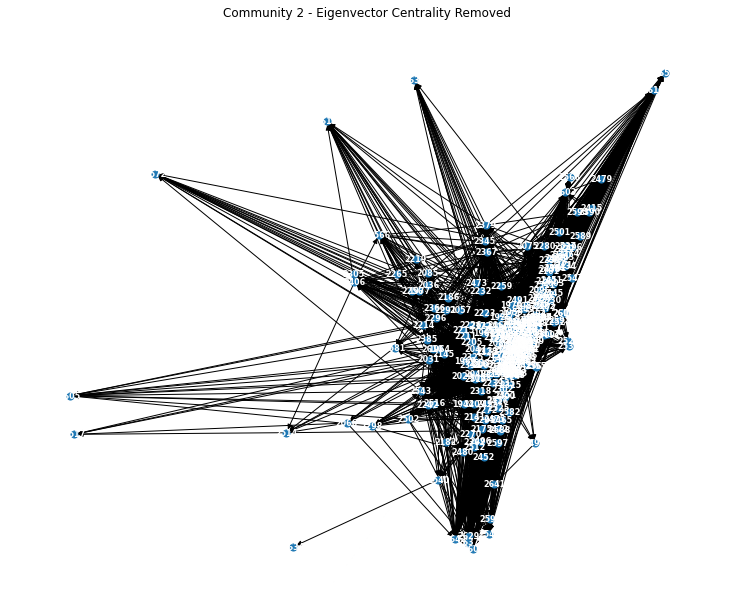

In [22]:
for community_id in largest_communities:
    community_nodes = [node for node, comm_id in communities.items() if comm_id == community_id]
    
    # Original community
    draw_community(G, community_nodes, f'Community {community_id} - Original')

    # Remove top nodes based on degree centrality
    G_degree_removed = remove_top_nodes(G.subgraph(community_nodes), nx.degree_centrality)
    draw_community(G_degree_removed, community_nodes, f'Community {community_id} - Degree Centrality Removed')

    # Remove top nodes based on closeness centrality
    G_closeness_removed = remove_top_nodes(G.subgraph(community_nodes), nx.closeness_centrality)
    draw_community(G_closeness_removed, community_nodes, f'Community {community_id} - Closeness Centrality Removed')

    # Remove top nodes based on betweenness centrality
    G_betweenness_removed = remove_top_nodes(G.subgraph(community_nodes), nx.betweenness_centrality)
    draw_community(G_betweenness_removed, community_nodes, f'Community {community_id} - Betweenness Centrality Removed')

    # Remove top nodes based on eigenvector centrality
    G_eigenvector_removed = remove_top_nodes(G.subgraph(community_nodes), lambda G: nx.eigenvector_centrality_numpy(G, max_iter=1000))
    draw_community(G_eigenvector_removed, community_nodes, f'Community {community_id} - Eigenvector Centrality Removed')


The 5, 3, and 2 have been determined to be the three largest settlements in the graph. These communities are made up of people who live in separate communities and are closely related to each other.

- The effect of eliminating the three most strongly connected nodes is displayed in the graph that had the top three nodes eliminated based on Degree Centrality. These nodes are thought to be significant in terms of total network connectivity because they have the most connections.

- The effect of eliminating nodes with the highest closeness centrality is shown in the graph that has the top three nodes deleted based on closeness centrality. Removing these nodes could prevent effective information flow within the network. Closeness Centrality determines how rapidly information can pass from a node to others.

- The impact of eliminating nodes that are essential to the information flow between various areas of the network is illustrated in the graph that has the top three nodes deleted based on Betweenness Centrality. For communication between other nodes, these nodes serve as either bottlenecks or bridges.

- The graph with the top 3 nodes removed based on Eigenvector Centrality displays the consequence of removing nodes that have the highest influence and importance based on their connections with other high-scoring nodes. These nodes can have a significant impact on the overall network influence.


## Influencers of those top 3 communities.

The red dots indicate the most influential nodes, aka customers.

In [25]:
def get_top_nodes(graph, centrality_measure, num_nodes=3):
    centrality_values = centrality_measure(graph)
    top_nodes = nlargest(num_nodes, centrality_values, key=centrality_values.get)
    return top_nodes

def draw_influencers(graph, community_nodes, centrality_measure, title):
    top_nodes = get_top_nodes(graph.subgraph(community_nodes), centrality_measure)
    draw_community_with_top_nodes(graph.subgraph(community_nodes), community_nodes, top_nodes, title)
def draw_community_with_top_nodes(graph, nodes, top_nodes, title):
    plt.figure(figsize=(10, 8))
    
    # Draw nodes in black
    nx.draw(graph, pos=nx.spring_layout(graph), with_labels=True, font_size=8, font_color='black', node_size=50, font_weight='bold')

    # Highlight top nodes in red
    nx.draw_networkx_nodes(graph, pos=nx.spring_layout(graph), nodelist=top_nodes, node_color='red', node_size=50)

    plt.title(title)
    plt.show()

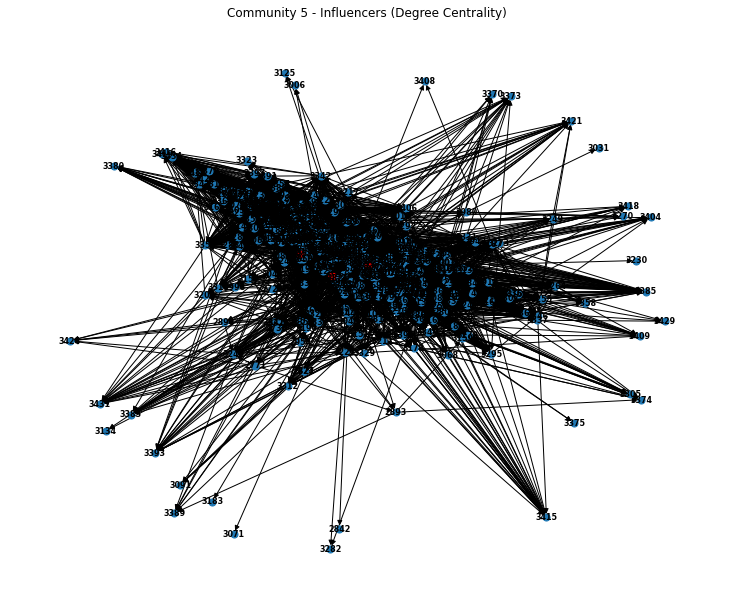

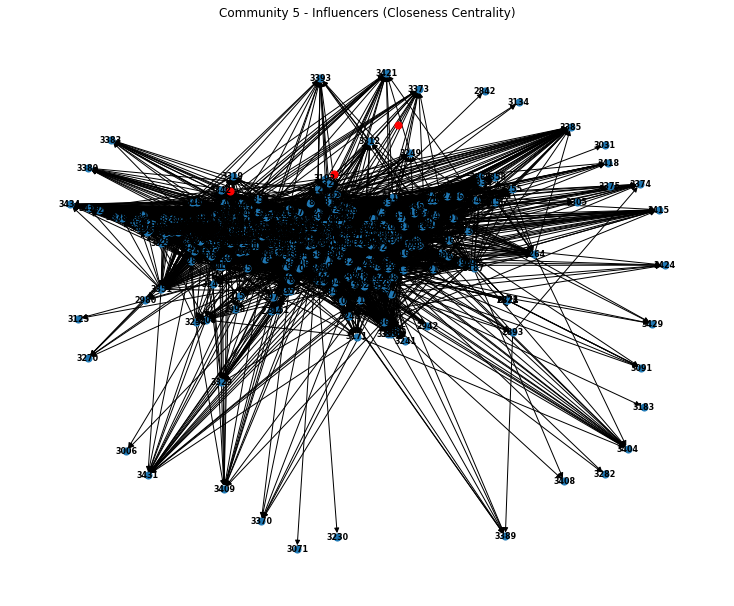

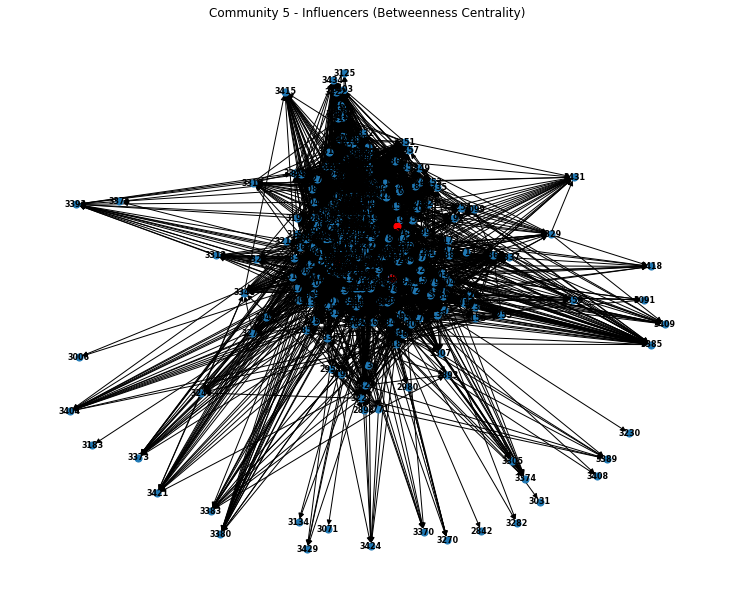

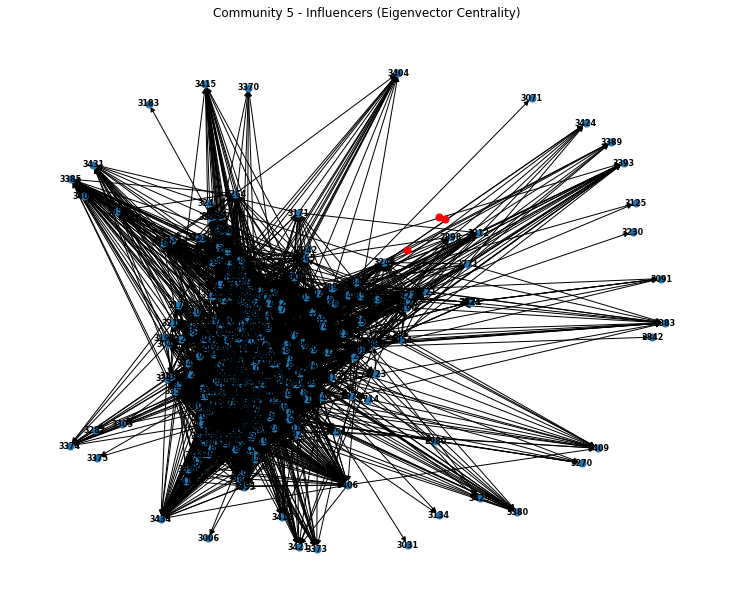

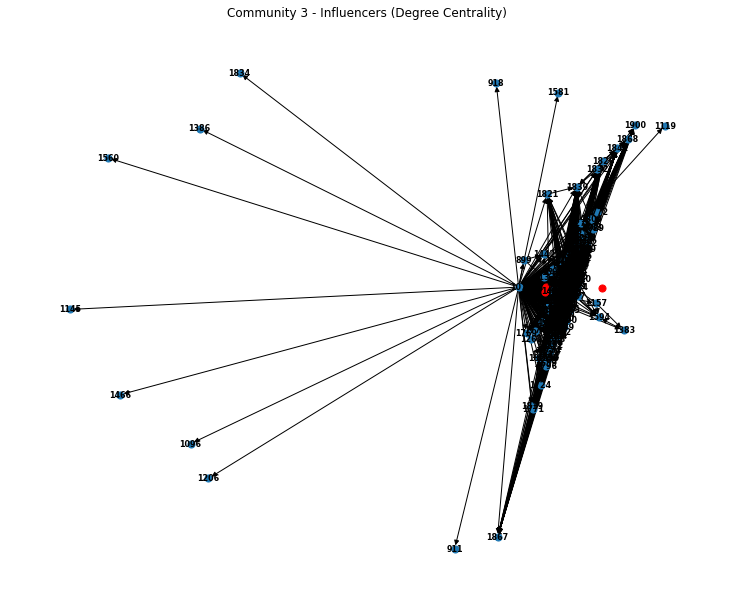

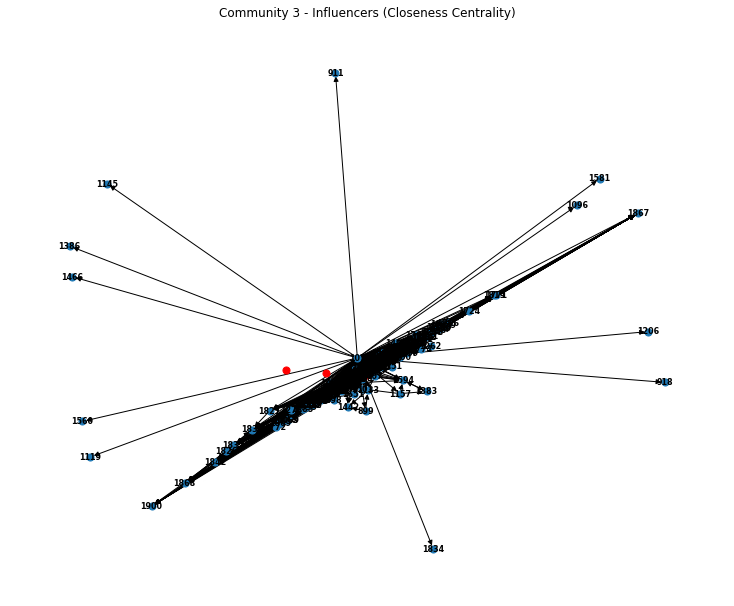

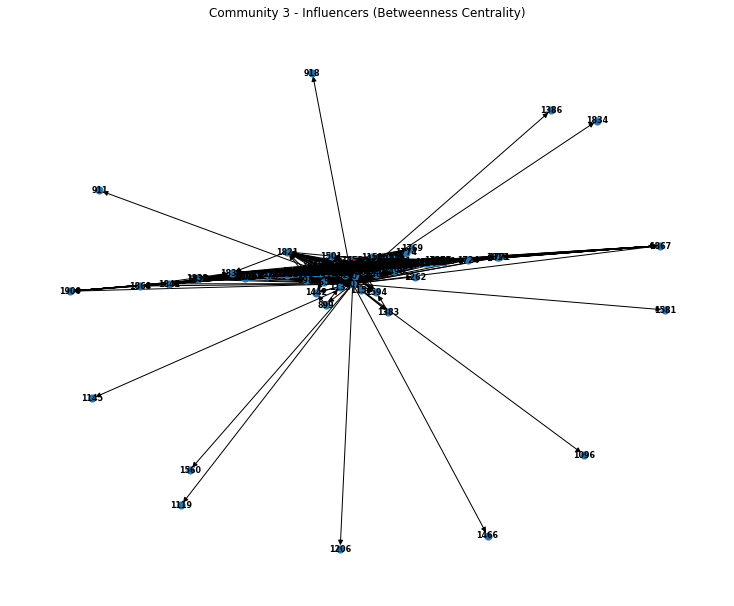

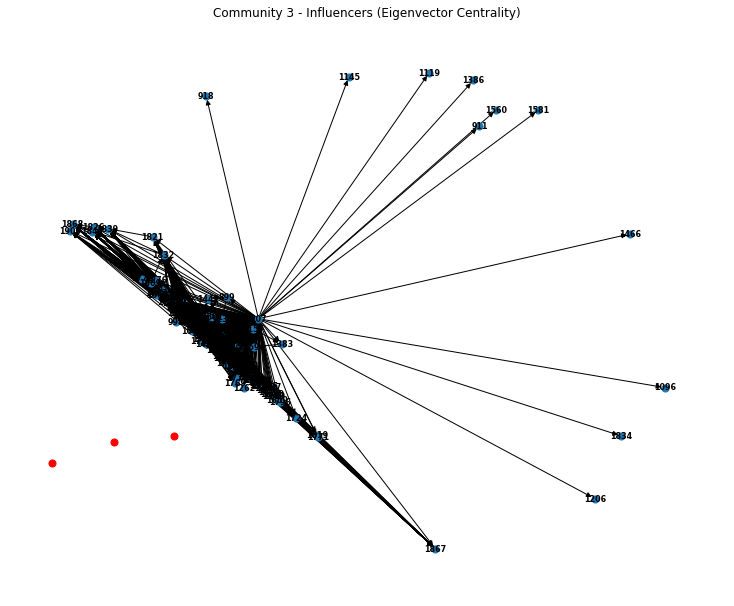

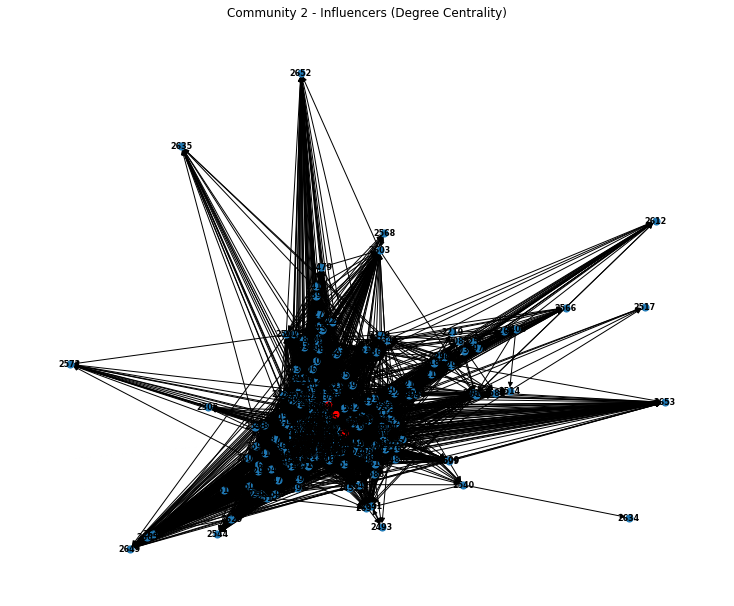

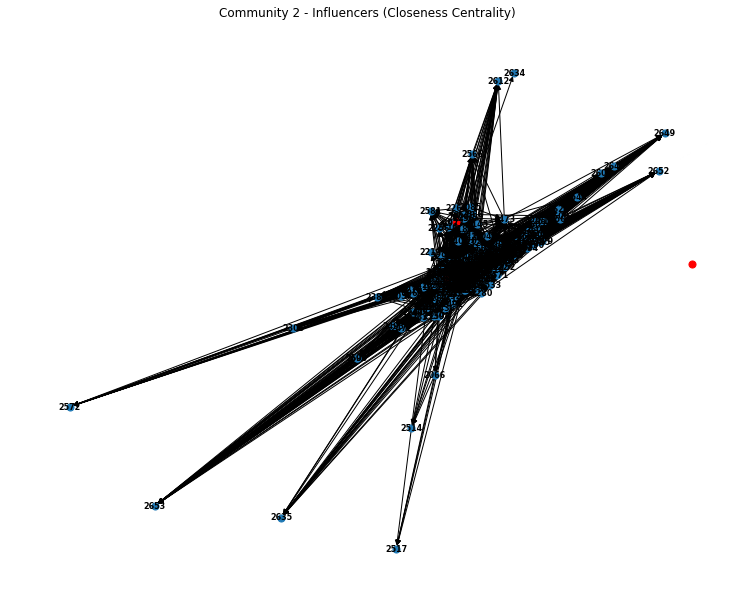

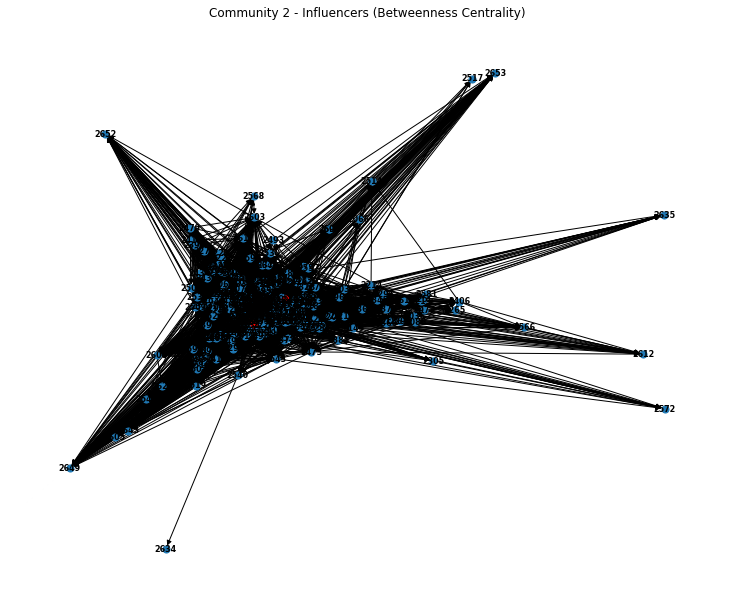

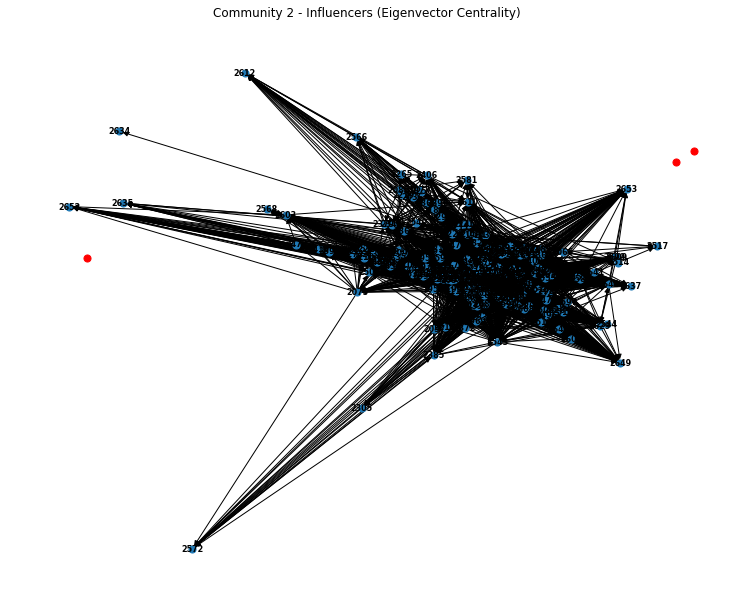

In [26]:
# Influencers of the top 3 communities
for community_id in largest_communities:
    community_nodes = [node for node, comm_id in communities.items() if comm_id == community_id]

    # based on degree centrality
    draw_influencers(G, community_nodes, nx.degree_centrality, f'Community {community_id} - Influencers (Degree Centrality)')

    # based on closeness centrality
    draw_influencers(G, community_nodes, nx.closeness_centrality, f'Community {community_id} - Influencers (Closeness Centrality)')

    # based on betweenness centrality
    draw_influencers(G, community_nodes, nx.betweenness_centrality, f'Community {community_id} - Influencers (Betweenness Centrality)')

    # based on eigenvector centrality
    draw_influencers(G, community_nodes, lambda G: nx.eigenvector_centrality_numpy(G, max_iter=1000), f'Community {community_id} - Influencers (Eigenvector Centrality)')


Being a part of Viva MTS team inspired me to create a hypothetical action plan for that specific telecom company. Please see an action plan in a separate file, `actionPlan.md`.